In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
import seaborn as sns
import geopandas
import geoplot
%matplotlib inline

In [148]:
my_cmap = 'GnBu'

# Plot where we have data from IMPACT

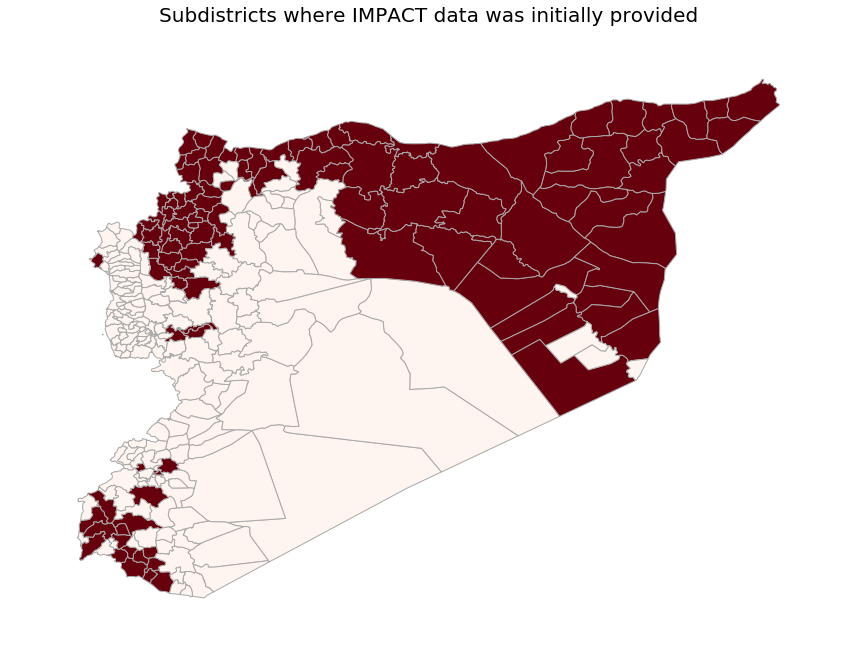

In [154]:
# import csv lat long file
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/01.exploration.001.4.IMPACT_locations.with_long_lat.csv'
data = pd.read_csv(fname, index_col=0)


# load syrian shapefile
shapefile = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_admin3.shp'
syria = geopandas.read_file(shapefile)

# identify where we have data available
syria['data_available'] = syria['PCODE'].isin(data['sdistr_code']).astype(int)


# plot
figname = 'where_impact_data_is_available'
fig, ax = plt.subplots(1, figsize=(12, 12))
gp = geoplot.choropleth(
    syria, hue=syria['data_available'],
    cmap='Reds', edgecolor='darkgray', legend=False, ax=ax
)
plt.title('Subdistricts where IMPACT data was initially provided', fontsize=20)

plt.tight_layout()
plt.savefig(f'{savepath}/{figname}.png',format = 'png',dpi=600,bbox_inches='tight')
plt.show()

# Plot how many months of change smeb available

/Users/hkromer/anaconda3/envs/h4g/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


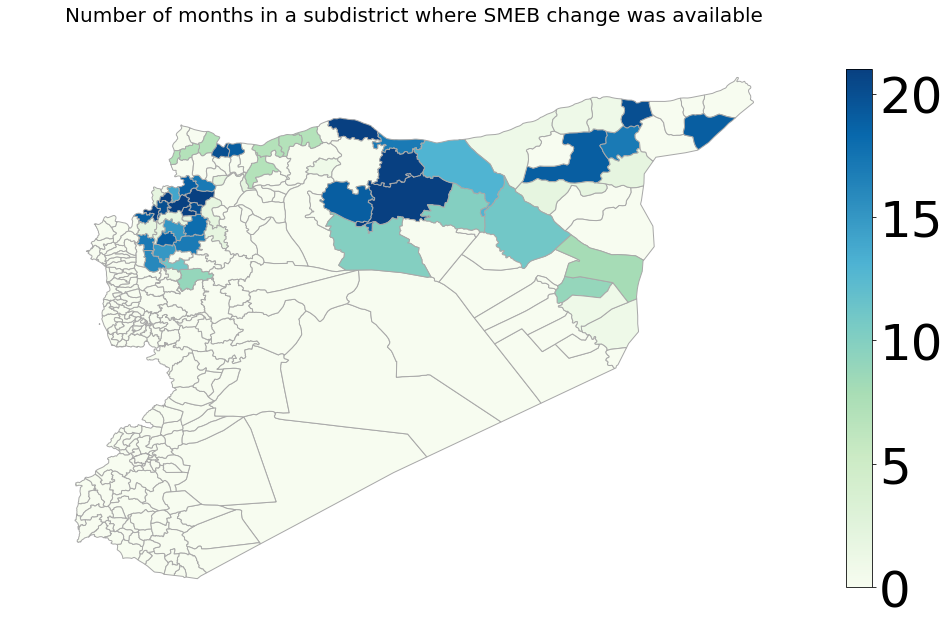

In [152]:
savepath = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/06.plots'
# import SMEB
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/05.cockpit/cockpit_file_agg_naintrap_change.csv'
data_smeb = pd.read_csv(fname, index_col=0)
# select columns to keep 
cols = ['q_sbd', 'q_gov','q_district','month', 'delta_Price_SMEB_total_sanswater']
data_smeb = data_smeb[cols]


# how many months (max is 21) of nonnan entries for the change in SMEB do we have, agg by sbd
datapoints_smeb = data_smeb.groupby('q_sbd')['delta_Price_SMEB_total_sanswater'].count()

# load syrian shapefile
shapefile = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_admin3.shp'
syria = geopandas.read_file(shapefile)

# add number of smeb datapoints
df_datapoints_smeb = pd.DataFrame(datapoints_smeb).reset_index()
syria = syria.merge(df_datapoints_smeb, left_on='PCODE', right_on='q_sbd', how='left')

# plot
figname = 'smeb_months_per_sbd'
fig, ax = plt.subplots(1, figsize=(12, 12))
gp = geoplot.choropleth(
    syria, hue=syria['delta_Price_SMEB_total_sanswater'],
    cmap=my_cmap, edgecolor='darkgray', legend=False, ax=ax
)
plt.title('Number of months in a subdistrict where SMEB change was available', fontsize=20)

# add colorbar
vmin = syria['delta_Price_SMEB_total_sanswater'].min()
vmin_global = vmin # have the same range in the IDP plot
vmax = syria['delta_Price_SMEB_total_sanswater'].max()
vmax_global = vmax # have the same range in the IDP plot


fig = ax.get_figure()
cax = fig.add_axes([1, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(cmap=my_cmap,norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, cax=cax,)
cbr.ax.tick_params(labelsize=50) 
plt.tight_layout()
plt.savefig(f'{savepath}/{figname}.png',format = 'png',dpi=600,bbox_inches='tight')
plt.show()


# Plot where displacement data is available

/Users/hkromer/anaconda3/envs/h4g/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


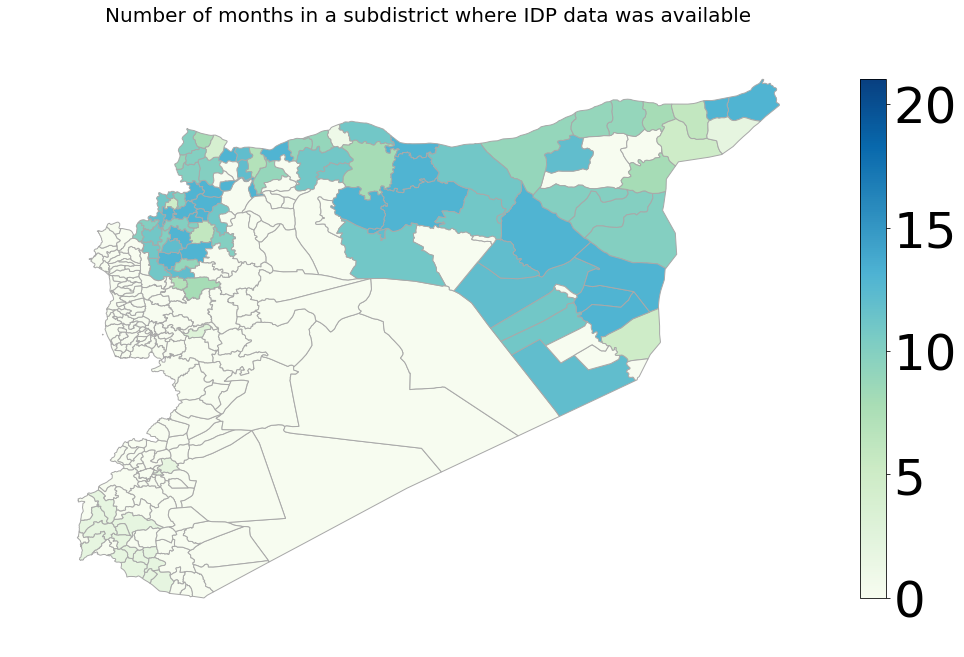

In [153]:
# import displacement
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/04.feature_eng.displacement.csv'
data_IDP = pd.read_csv(fname, index_col=0)

# how many months (max is 21) of nonnan entries for the change in SMEB do we have, agg by sbd
datapoints_IDP = data_IDP.groupby('q_sbd')['month'].count()

# load syrian shapefile
shapefile = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_admin3.shp'
syria = geopandas.read_file(shapefile)

# add number of smeb datapoints
df_datapoints_IDP = pd.DataFrame(datapoints_IDP).reset_index()
syria = syria.merge(df_datapoints_IDP, left_on='PCODE', right_on='q_sbd', how='left')

# plot
figname = 'IDP_months_per_sbd'
fig, ax = plt.subplots(1, figsize=(12, 12))
gp = geoplot.choropleth(
    syria, hue=syria['month'],
    cmap=my_cmap, edgecolor='darkgray', legend=False, norm=plt.Normalize(vmin=vmin_global, vmax=vmax_global), ax=ax
)
plt.title('Number of months in a subdistrict where IDP data was available', fontsize=20)

# add colorbar
vmin = syria['month'].min()
vmax = syria['month'].max()
fig = ax.get_figure()
cax = fig.add_axes([1, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin_global, vmax=vmax_global))
sm._A = []
cbr = fig.colorbar(sm, cax=cax,)
cbr.ax.tick_params(labelsize=50) 
plt.tight_layout()
plt.savefig(f'{savepath}/{figname}.png',format = 'png',dpi=600,bbox_inches='tight')
plt.show()


# Plot correlation values - gov level

/Users/hkromer/anaconda3/envs/h4g/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


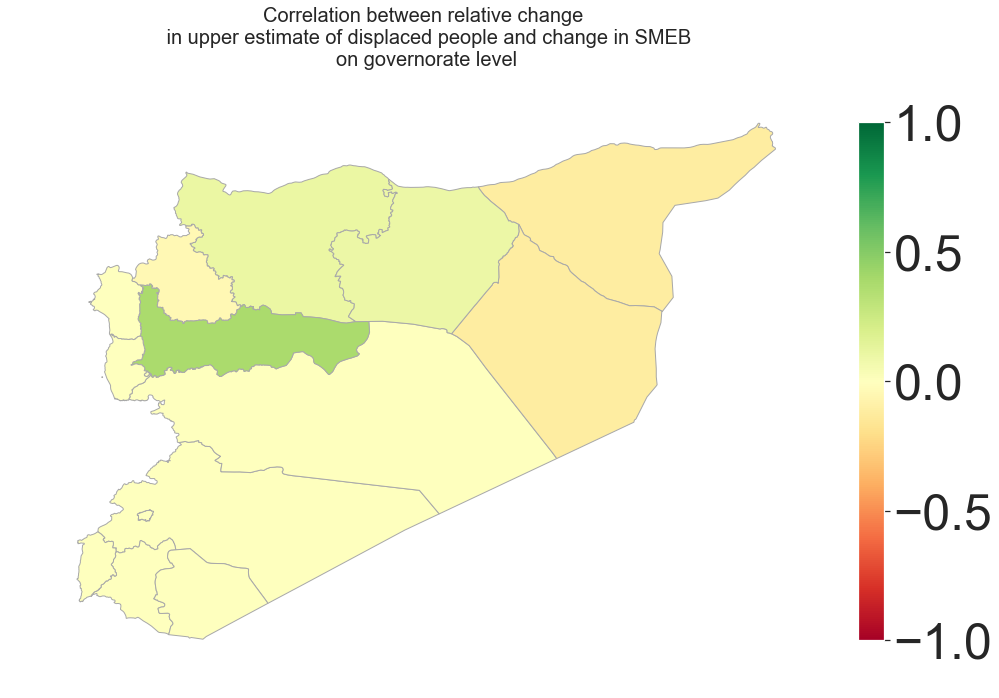

In [192]:
# import SMEB
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/05.cockpit/cockpit_file_agg_naintrap_change.csv'
data_smeb = pd.read_csv(fname, index_col=0)
# select columns to keep 
cols = ['q_sbd', 'q_gov','q_district','month', 'delta_Price_SMEB_total_sanswater']
data_smeb = data_smeb[cols]
# data_smeb.head()

# import displacement
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/04.feature_eng.displacement.csv'
data_IDP = pd.read_csv(fname, index_col=0)
# select columns to keep 
# print(data_IDP.columns)
cols = ['q_sbd', 'q_gov', 'q_district','month', 'inc_min_IDPs_sum',
 'inc_max_IDPs_sum',
 'inc_min_pre_conf_pop_remained_mean',
 'inc_max_pre_conf_pop_remained_mean',
 'delta_rel_min_IDPs_sum',
 'delta_rel_max_IDPs_sum',
 'delta_abs_min_pre_conf_pop_remained_mean',
 'delta_abs_max_pre_conf_pop_remained_mean']
data_IDP = data_IDP[cols]
# data_IDP.head()

# join the data based on the smeb data
data = data_smeb.merge(data_IDP, left_on=['q_sbd','month','q_gov','q_district'], right_on = ['q_sbd','month','q_gov','q_district'], how='left')
assert data.shape[0] == data_smeb.shape[0]

# correlation matrix per governorate
# governorate
sns.set()
d_ = dict()
govs = data['q_gov'].unique()
for gov in govs:
    this_data = data[data['q_gov']==gov]
    cols = ['delta_rel_max_IDPs_sum']
    cm = this_data.corr(method ='pearson').loc[cols,'delta_Price_SMEB_total_sanswater'].values[0]
    d_[gov] = cm


df_cm_gov = pd.DataFrame(d_, index=['corr_delta_rel_max_IDPs_sum_VS_delta_Price_SMEB_total_sanswater']).T.dropna().reset_index()
df_cm_gov = df_cm_gov.rename(columns={'index': 'q_gov'})


# plot
# load syrian shapefile
shapefile = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_admin1.shp'
syria = geopandas.read_file(shapefile)

# add correlation
syria = syria.merge(df_cm_gov, left_on='PCODE', right_on='q_gov', how='left')
syria['corr_delta_rel_max_IDPs_sum_VS_delta_Price_SMEB_total_sanswater'] = syria['corr_delta_rel_max_IDPs_sum_VS_delta_Price_SMEB_total_sanswater'].fillna(0)
# syria

# plot
vmin, vmax = -1, 1
my_cmap = 'RdYlGn'
figname = 'corr_max_IDP_change_vs_smeb_gov'
fig, ax = plt.subplots(1, figsize=(12, 12))
gp = geoplot.choropleth(
    syria, hue=syria['corr_delta_rel_max_IDPs_sum_VS_delta_Price_SMEB_total_sanswater'],
    cmap=my_cmap, edgecolor='darkgray', legend=False, norm=plt.Normalize(vmin=vmin, vmax=vmax), ax=ax
)
plt.title('Correlation between relative change ' + '\n'+' in upper estimate of displaced people and change in SMEB' + '\n'+ 'on governorate level', fontsize=20)

# add colorbar

fig = ax.get_figure()
cax = fig.add_axes([1, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, cax=cax,)
cbr.ax.tick_params(labelsize=50) 
plt.tight_layout()
plt.savefig(f'{savepath}/{figname}.png',format = 'png',dpi=600,bbox_inches='tight')
plt.show()

# Plot correlation values - district level

/Users/hkromer/anaconda3/envs/h4g/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


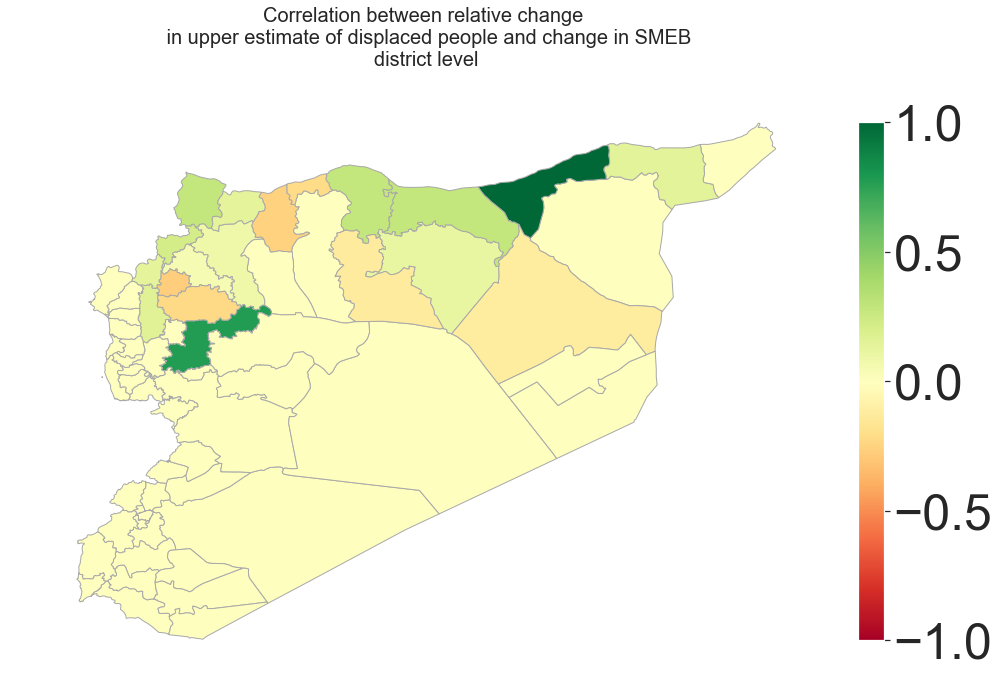

In [191]:
# import SMEB
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/05.cockpit/cockpit_file_agg_naintrap_change.csv'
data_smeb = pd.read_csv(fname, index_col=0)
# select columns to keep 
cols = ['q_sbd', 'q_gov','q_district','month', 'delta_Price_SMEB_total_sanswater']
data_smeb = data_smeb[cols]
# data_smeb.head()

# import displacement
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/04.feature_eng.displacement.csv'
data_IDP = pd.read_csv(fname, index_col=0)
# select columns to keep 
# print(data_IDP.columns)
cols = ['q_sbd', 'q_gov', 'q_district','month', 'inc_min_IDPs_sum',
 'inc_max_IDPs_sum',
 'inc_min_pre_conf_pop_remained_mean',
 'inc_max_pre_conf_pop_remained_mean',
 'delta_rel_min_IDPs_sum',
 'delta_rel_max_IDPs_sum',
 'delta_abs_min_pre_conf_pop_remained_mean',
 'delta_abs_max_pre_conf_pop_remained_mean']
data_IDP = data_IDP[cols]
# data_IDP.head()

# join the data based on the smeb data
data = data_smeb.merge(data_IDP, left_on=['q_sbd','month','q_gov','q_district'], right_on = ['q_sbd','month','q_gov','q_district'], how='left')
assert data.shape[0] == data_smeb.shape[0]

# correlation matrix per governorate
# governorate
sns.set()
d_ = dict()
# district
districts = data['q_district'].unique()
for d in districts:
    this_data = data[data['q_district']==d]
    cols = ['delta_rel_max_IDPs_sum']
    cm = this_data.corr(method ='pearson').loc[cols,'delta_Price_SMEB_total_sanswater'].values[0]
    d_[d] = cm


df_cm_district = pd.DataFrame(d_, index=['corr_delta_rel_max_IDPs_sum_VS_delta_Price_SMEB_total_sanswater']).T.dropna().reset_index()
df_cm_district = df_cm_district.rename(columns={'index': 'q_district'})


# plot
# load syrian shapefile
shapefile = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_admin2.shp'
syria = geopandas.read_file(shapefile)

# add correlation
syria = syria.merge(df_cm_district, left_on='PCODE', right_on='q_district', how='left')
syria['corr_delta_rel_max_IDPs_sum_VS_delta_Price_SMEB_total_sanswater'] = syria['corr_delta_rel_max_IDPs_sum_VS_delta_Price_SMEB_total_sanswater'].fillna(0)
# syria

# plot
vmin, vmax = -1, 1
my_cmap = 'RdYlGn'
figname = 'corr_max_IDP_change_vs_smeb_district'
fig, ax = plt.subplots(1, figsize=(12, 12))
gp = geoplot.choropleth(
    syria, hue=syria['corr_delta_rel_max_IDPs_sum_VS_delta_Price_SMEB_total_sanswater'],
    cmap=my_cmap, edgecolor='darkgray', legend=False, norm=plt.Normalize(vmin=vmin, vmax=vmax), ax=ax
)
plt.title('Correlation between relative change ' + '\n'+' in upper estimate of displaced people and change in SMEB' + '\n'+ 'on district level', fontsize=20)

# add colorbar

fig = ax.get_figure()
cax = fig.add_axes([1, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, cax=cax,)
cbr.ax.tick_params(labelsize=50) 
plt.tight_layout()
plt.savefig(f'{savepath}/{figname}.png',format = 'png',dpi=600,bbox_inches='tight')
plt.show()